In [1]:
import sys
import os

#otherwise our imports get all messed up
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import pandas as pd

from K_mean_cluster import run_clustering




In [7]:
BA_US_knn_text = pd.read_csv('../../../knnData/BA_US_knn_text.csv')

(50, 824)
(50, 824)


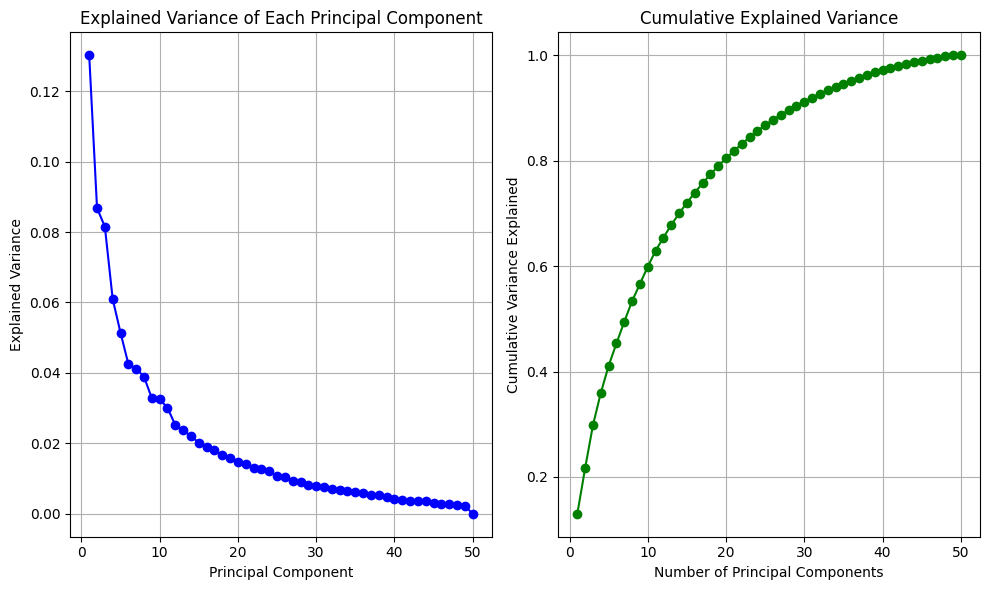

Top features for PC1:
American IPA_avg_taste                0.083549
American IPA_avg_overall              0.081084
American Pale Ale (APA)_avg_palate    0.080241
American Pale Ale (APA)_avg_taste     0.080232
American Brown Ale_avg_palate         0.079230
                                        ...   
Faro_avg_taste                        0.000038
Tripel_normalised_review_count        0.000025
Sahti_avg_palate                      0.000021
Faro_std_per_style                    0.000000
Faro_avg_rating_per_style             0.000000
Name: PC1, Length: 824, dtype: float64

Top features for PC2:
English Barleywine_avg_aroma                                   0.088175
English Bitter_avg_palate                                      0.087581
Herbed / Spiced Beer_avg_palate                                0.085375
English Bitter_avg_appearance                                  0.085026
Cream Ale_avg_rating_per_style                                 0.084786
                                       

c:\Users\Enzo\anaconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Cluster 0: ['Alaska', 'Arkansas', 'Connecticut', 'Maine', 'Massachusetts', 'Minnesota', 'New Hampshire', 'Rhode Island', 'South Dakota', 'Vermont']
Cluster 1: ['Delaware', 'Georgia', 'Illinois', 'Michigan', 'New York', 'North Carolina', 'South Carolina']
Cluster 2: ['Alabama', 'Arizona', 'California', 'Colorado', 'Florida', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Cluster 3: ['Utah']


In [5]:
run_clustering(BA_US_knn_text)

In [ ]:
RB_US_knn_text = pd.read_csv('../../../knnData/RB_US_knn_text.csv')

run_clustering(RB_US_knn_text)

FileNotFoundError: [Errno 2] No such file or directory: '../knnData/RB_US_knn_text.csv'

In [8]:
#UMAP clustering
#how do i import it from prepData
from utils.prepData import prep_data
df_total_clustering, states = prep_data(BA_US_knn_text)




user_state  Altbier_avg_appearance  Altbier_avg_aroma  Altbier_avg_palate  \
0    Alabama                4.058824           3.735294            3.764706   
1     Alaska                3.869048           3.559524            3.583333   
2    Arizona                3.677326           3.500000            3.546512   

   Altbier_avg_taste  Altbier_avg_overall  Altbier_avg_rating_per_style  \
0           3.911765             3.955882                      3.745882   
1           3.642857             3.738095                      3.695714   
2           3.587209             3.622093                      3.671395   

   Altbier_std_per_style  Altbier_normalised_review_count  \
0               0.252365                         0.001860   
1               0.217499                         0.004418   
2               0.213167                         0.004316   

   American Adjunct Lager_avg_appearance  ...  Winter Warmer_std_per_style  \
0                               2.879412  ...                     0.276159   
1                               2.973404  ...                     0.237782   
2                               3.019345  ...                     0.216654   

   Winter Warmer_normalised_review_count  Witbier_avg_appearance  \
0                               0.007441                3.597561   
1                               0.010520                3.891791   
2                               0.014051                3.576284   

   Witbier_avg_aroma  Witbier_avg_palate  Witbier_avg_taste  \
0           3.573171            3.474085           3.429878   
1           3.723881            3.817164           3.798507   
2           3.574773            3.552870           3.559668   

   Witbier_avg_overall  Witbier_avg_rating_per_style  Witbier_std_per_style  \
0             3.568598                      3.557256               0.282003   
1             3.902985                      3.763881               0.251342   
2             3.577795                      3.568489               0.329566   

   Witbier_normalised_review_count  
0                         0.017947  
1                         0.014096  
2                         0.016610  

[3 rows x 825 columns]

In [20]:
import umap
from mpl_toolkits.mplot3d import Axes3D

#UMAP

# Step 1: Drop the 'user_state' column as it's just an identifier and not used for UMAP
df_total_clustering_cleaned = df_total_clustering.drop(columns=['user_state'])

print(df_total_clustering_cleaned.shape)
# Fill NaN values with 0
df_cleaned = df_total_clustering_cleaned.fillna(0)

# Check the shape again
print(df_cleaned.shape)

umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(df_cleaned)


(50, 824)
(50, 824)


c:\Users\iaran\miniconda3\envs\ada\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
import umap
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Step 1: Drop the 'user_state' column as it's just an identifier and not used for UMAP
df_total_clustering_cleaned = df_total_clustering.drop(columns=['user_state'])

print(df_total_clustering_cleaned.shape)
# Fill NaN values with 0
df_cleaned = df_total_clustering_cleaned.fillna(0)
# Assuming df_total_clustering_cleaned is the cleaned dataframe (no 'user_state')
# Apply UMAP to reduce dimensions to 3
umap_3d = umap.UMAP(n_components=3, random_state=42)
embedding_3d = umap_3d.fit_transform(df_cleaned)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(embedding_3d)

# Add the cluster labels back to the dataframe
df_cleaned['Cluster'] = kmeans_labels
df_cleaned['user_state'] = df_total_clustering['user_state']  # Assuming original_df has 'user_state'

#Plot the 3D UMAP with Plotly and only show 'user_state' on hover
fig = px.scatter_3d(df_cleaned, x=embedding_3d[:, 0], y=embedding_3d[:, 1], z=embedding_3d[:, 2],
                    color='Cluster', title="K-means Clustering on UMAP",
                    labels={'Cluster': 'Cluster Label'},
                    hover_data={'user_state': True, 'Cluster': False})  # Only show user_state on hover, hide Cluster

fig.show()

# Output states in each cluster
clustered_states = {}
for cluster_num in range(4):
    states_in_cluster = df_cleaned[df_cleaned['Cluster'] == cluster_num]['user_state'].tolist()
    clustered_states[cluster_num] = states_in_cluster

# Print out the states in each cluster
for cluster_num, states in clustered_states.items():
    print(f"Cluster {cluster_num}: {states}")


(50, 824)


c:\Users\iaran\miniconda3\envs\ada\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\iaran\miniconda3\envs\ada\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Cluster 0: ['Alaska', 'Delaware', 'Maine', 'New Hampshire', 'Texas', 'West Virginia']
Cluster 1: ['California', 'Colorado', 'Florida', 'Illinois', 'Indiana', 'Kentucky', 'Maryland', 'Massachusetts', 'Missouri', 'New Jersey', 'New York', 'Ohio', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Vermont', 'Washington']
Cluster 2: ['Connecticut', 'Georgia', 'Michigan', 'Minnesota', 'North Carolina', 'Oregon', 'Tennessee', 'Virginia', 'Wisconsin']
Cluster 3: ['Alabama', 'Arizona', 'Arkansas', 'Hawaii', 'Idaho', 'Iowa', 'Kansas', 'Louisiana', 'Mississippi', 'Montana', 'Nebraska', 'Nevada', 'New Mexico', 'North Dakota', 'Oklahoma', 'South Dakota', 'Utah', 'Wyoming']


In [30]:
from sklearn.cluster import DBSCAN
# Step 2: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=5)  # You can tune these parameters
dbscan_labels = dbscan.fit_predict(embedding_3d)

# Step 3: Create a DataFrame with the DBSCAN labels and original states (if needed)
df_clustering = df_total_clustering.copy()  # Assuming 'user_state' is part of df_total_clustering
df_clustering['DBSCAN_Cluster'] = dbscan_labels

# Output the states in each cluster
for cluster in set(dbscan_labels):
    print(f"Cluster {cluster}:")
    print(df_clustering[df_clustering['DBSCAN_Cluster'] == cluster]['user_state'].tolist())

# Step 4: Visualize the clustering result in 3D with Plotly
fig = px.scatter_3d(df_clustering, x=embedding_3d[:, 0], y=embedding_3d[:, 1], z=embedding_3d[:, 2],
                    color='DBSCAN_Cluster', title="DBSCAN Clustering on UMAP-reduced Data")

fig.show()

Cluster -1:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
